In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Introduction (answer the following quesitons below with viz)
* Do students in more popular majors make more money?
* How many majors are predominantly male? Predominantly female?
* Which category of majors have the most students?

In [3]:
recent_grads = pd.read_csv("recent-grads.csv")

In [7]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [8]:
# use DataFrame.iloc[] to return the first row formatted as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [9]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [10]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [12]:
recent_grads.isnull().sum() # from below a couple of NaNs, not too many

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [14]:
raw_data_count = recent_grads.shape[0]
print(f'Number of rows in df: {raw_data_count}')

Number of rows in df: 173


In [15]:
recent_grads = recent_grads.dropna()

In [16]:
recent_grads.shape # looks like it only dropped 1 row.

(172, 21)

In [18]:
cleaned_data_count = recent_grads.shape[0]
print(f'Number of rows in cleaned df, i.e. after dropna(): {cleaned_data_count}')

Number of rows in cleaned df, i.e. after dropna(): 172


## Pandas Scatter Plots
Note that Pandas has a wrapper for matplotlib and it can be accessed via, DataFrame.plot().
Create scatter plots for the following pairs.
* Sample_size and Median
* Sample_size and Unemployment_rate
* Full_time and Median
* ShareWomen and Unemployment_rate
* Men and Median
* Women and Median

<AxesSubplot:title={'center':'Employed vs. Sample_size'}, xlabel='Sample_size', ylabel='Employed'>

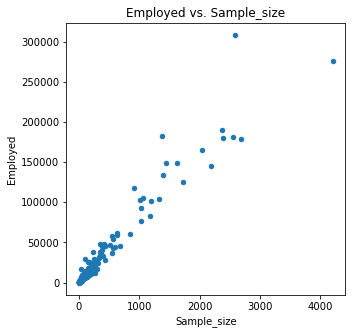

In [23]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,5))

Text(0.5, 1.0, 'Employed vs. Sample_size (with axes)')

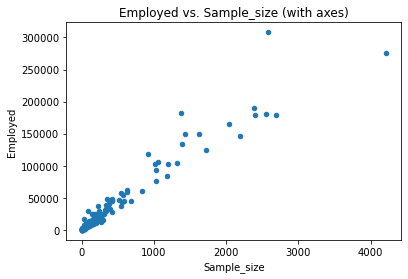

In [22]:
# break up the plot into axes
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size (with axes)')

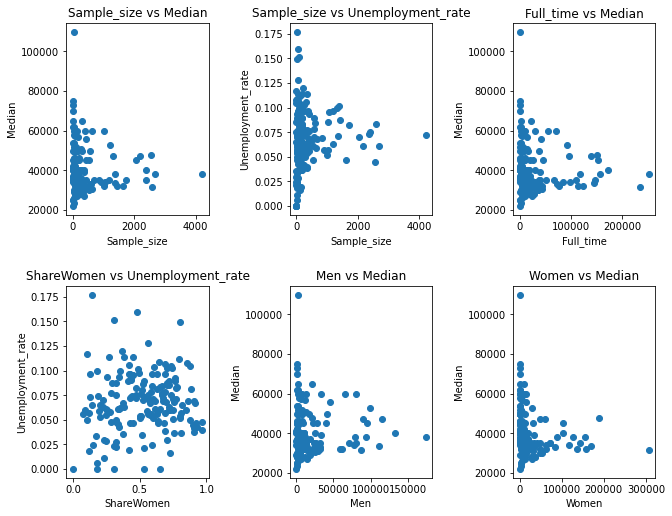

In [93]:
# plot everything in one run with matplotlib
row1 = {
    "Sample_size vs Median": ('Sample_size', 'Median'),
    "Sample_size vs Unemployment_rate": ('Sample_size', 'Unemployment_rate'),
    "Full_time vs Median": ('Full_time', 'Median'),
}
row2 = {
    "ShareWomen vs Unemployment_rate": ('ShareWomen', 'Unemployment_rate'),
    "Men vs Median": ('Men', 'Median'),
    "Women vs Median": ('Women', 'Median')
}

rows, cols = 2, 3
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (10, 8))
fig.tight_layout(pad=5)
for row in range(rows):
    plot_type = row1 if row == 0 else row2
    for col, p in zip(range(cols), plot_type.items()):
        # print(col, p[1])
        title_name = p[0]
        x_vals = recent_grads[p[1][0]].values
        y_vals = recent_grads[p[1][1]].values
        ax[row, col].scatter(x=x_vals, y=y_vals)
        ax[row, col].set_title(title_name)
        ax[row, col].set_xlabel(p[1][0])
        ax[row, col].set_ylabel(p[1][1])


The above is much cleaner but does not use pandas built in wrapper of matplotlib. For faster viz, perhaps just do a line by line using the wrapper as below.

<AxesSubplot:xlabel='Sample_size', ylabel='Median'>

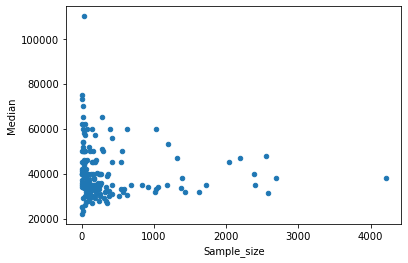

In [94]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>

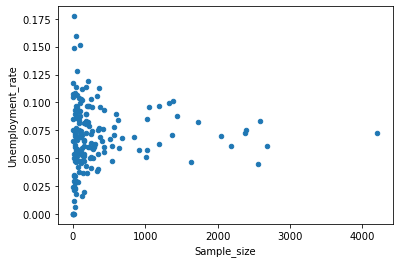

In [95]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

<AxesSubplot:xlabel='Full_time', ylabel='Median'>

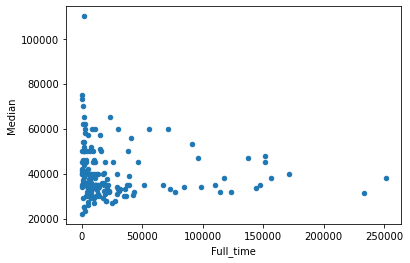

In [96]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

<AxesSubplot:xlabel='ShareWomen', ylabel='Unemployment_rate'>

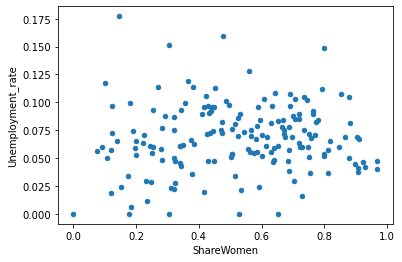

In [97]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

<AxesSubplot:xlabel='Men', ylabel='Median'>

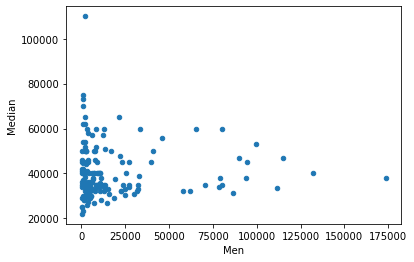

In [98]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

<AxesSubplot:xlabel='Women', ylabel='Median'>

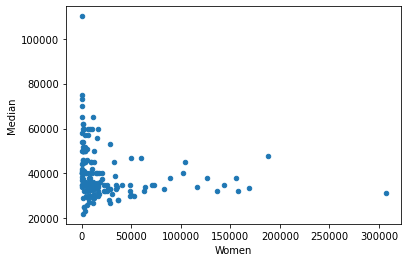

In [99]:
recent_grads.plot(x='Women', y='Median', kind='scatter')